### Latar Belakang
##### Deskripsi Data
* Masalah klasifikasi biner
* Sumber data dari Kaggle : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package. Dengan jumlah baris 145460. Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih.
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi




##### Objective
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediksi

### Import pustaka yang dibutuhkan

In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report, roc_curve
import pickle #untuk export model


### Data Loading

In [182]:
df = pd.read_csv("dataset/weatherAUS.csv")
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
86700,2016-02-12,Brisbane,20.8,30.6,0.0,9.2,11.4,SE,41.0,SSE,...,58.0,49.0,1013.2,1011.4,3.0,7.0,27.4,29.3,No,No
96762,2009-09-16,Adelaide,16.3,26.2,0.2,5.0,1.9,NNE,50.0,NE,...,42.0,62.0,1013.3,1009.8,NaN,NaN,19.8,19.4,No,Yes
40986,2013-03-18,Williamtown,13.6,22.9,2.8,8.2,9.8,SSE,44.0,W,...,72.0,52.0,1020.7,1020.1,1.0,5.0,17.0,22.1,Yes,No
37075,2010-07-01,WaggaWagga,2.4,12.8,0.4,1.0,7.5,WSW,20.0,NaN,...,94.0,57.0,1025.2,1024.4,1.0,1.0,6.2,12.0,No,No
68054,2010-11-02,Melbourne,10.5,19.0,0.6,4.4,3.2,WSW,44.0,WSW,...,78.0,77.0,1018.4,1016.9,NaN,NaN,13.4,16.1,No,Yes


In [183]:
# Melihat dimensi dataset
df.shape

(145460, 23)

In [184]:
# Melihat tipe dat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Informasi yang didapat dari data
* 145460 rows 
* 23 columns 
* 7 columns we have object 
* 16 columns we have folat 
* Tipe data "Date" perlu dikonversi ke datetime/dilakukan ekstraksi
* Tipe data untuk kolom lain selain "Date" terlihat sudah sesuai

### Data Cleaning

In [185]:
df.describe() #cek deskripsi data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Analisis<br> </b>
<ol>
    <li>Rata-rata minimum temperature adalah 12.194 and rata-rata maximum temperature adalah 23.221 derajat Celcius.</li>
    <li>Rata-rata rainfall adalah 2.36 mm.</li>
    <li>Rata-rata sunshine recieved adalah 7.61 hour.</li>
    <li>Rata-rata wind gust speed adalah 40.035 km/hr.</li>
    <li>Temperature minimum yang dicatat adalah -8.5 derajat Celcius and temperature maksimum yang dicatat adalah 48.1 derajat Celcius.</li>
    <li>Rainfall minimum yang tercatat pada hari-hari tertentu adalah 0 mm and maksimumnya adalah 371 mm.</li>
    <li>Median dari evaporation adalah 4.8 mm.</li>
</ol>

In [186]:
df.describe(include= "object")  # cek deskripsi data termasuk objek

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


<b> Statistik yang ditampilkan untuk atribut tipe data 'objek' berbeda dengan yang ditampilkan untuk tipe data numerik.</b><br>
Analisis<br> </b>
<ol>
     <li>Ada total 49 lokasi (unique) dan 16 arah angin (unique).</li>
     <li>Atribut RainToday dan RainTomorrow memiliki 2 unique value.</li>
     <li>Lokasi teratas adalah Canberra yang terjadi 3436 kali.</li>
</ol>

In [187]:
# Melihat nilai null pada dataset
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Analisis<br>
<ol>
     <li>Nilai null maksimum ada di kolom Sunshine diikuti oleh Evaporasi.</li>
     <li>Lebih dari 55.000 nilai null ada di kolom Cloud9am dan Cloud3pm.</li>
     <li>Sekitar 15.000 nilai nol ada di kolom Pressure9am dan Pressure3pm.</li>
     <li>Lebih dari 10.000 nilai nol ada di kolom WindGustDir, WindGustSpeed, dan WindDir9am</li>
     <li>Ada banyak kolom yang memiliki lebih dari 1000 catatan nol.</li>
</ol>

In [188]:
# Drop Sunshine, Evaporation, Cloud9am and Cloud3pm karena kebanyakan nilainya null

col = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']
df.drop(col, axis=1, inplace=True)

##### Pisahkan Fitur (Kolom) Categorical dan Numerical 

In [189]:
# Memeriksa fitur categorical dan hitung jumlahnya

cat_features = [columns_name for columns_name in df.columns if df[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))

Number of Categorical Features we have in data is : 7  
Here is Listed features ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [190]:
# Memeriksa fitur numerical dan hitung jumlahnya 

num_features = [columns_name for columns_name in df.columns if df[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))


Number of Numerical Features we have in data is : 12  
Here is the Listed Numerical features ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'] 


##### Cek Kardinalitas
* jumlah unique value dalam kardinalitas
* jika ada banyak unique value maka sulit untuk melakukan pengkodean label
* juga berpengaruh pada efisiensi model

In [191]:
for i  in cat_features:
  count = len(df[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

#karena nilai unique value dalam kolom Date sangat besar, maka Cardinal data tinggi yang akan membuat beberapa permasalahan efisiensi

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column RainToday : 3 
The Cardinality of each column RainTomorrow : 3 


##### Menangani Masalah Kardinalitas

In [192]:
# Convert tanggal menjadi format Date, kemudian ambil 'Month' karena tanggal dan tahun tidak bisa digunakan untuk prediksi karena nilai selalu berubah.
df["Date"] = pd.to_datetime(df["Date"])      
df["Month"] = df["Date"].dt.month        

In [193]:
df.head()  # kolomnya di paling akhir

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


In [194]:
# Hapus kolom 'Date' karena sudah tidak berguna

df.drop("Date", axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


##### Menangani Missing Value (Categorical Variables)

In [195]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype =="O"]

In [196]:
categorical_features  # 'Date' sudah tidak masuk ke categorical feature lagi.

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [197]:
missing_cat = df[categorical_features].isnull().sum() # Total missing values 
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


<BarContainer object of 6 artists>

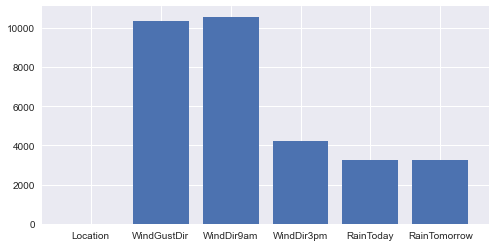

In [198]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values ) # dari visualisasi, winDir3pm punya banyak missing value 

In [199]:
#  Ganti missing value untuk categorical features dengan mode dari setiap kolom.
cat_features_with_null = [features for features in categorical_features if df[features].isnull().sum()] 
for each_feature in cat_features_with_null:
  df[each_feature] = df[each_feature].fillna(df[each_feature].mode()[0])    


In [200]:
df[categorical_features].isnull().sum()  # tidak ada missing value lagi

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Menangani Missing Value (Numerical)

In [201]:
# List kolom yang memiliki numerical value
num_col = [num_col for num_col in df.columns if df[num_col].dtype !="O"] 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

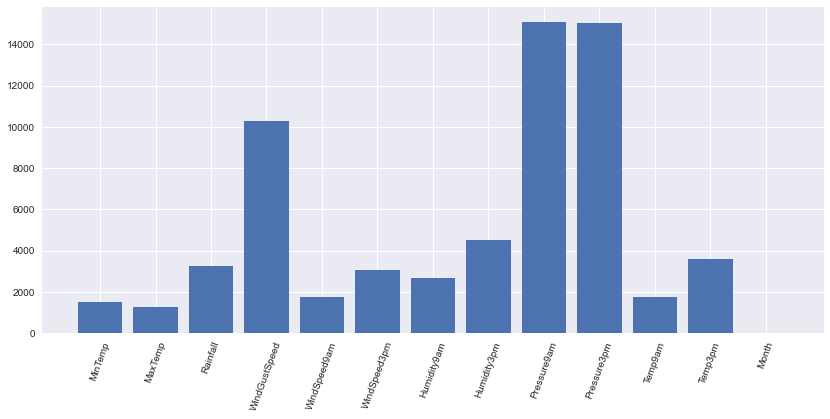

In [202]:
plt.style.use('seaborn')
missing_num = df[num_col].isnull().sum()    # hitung missing values di setiap list, yang disimpan di num_feature 
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)

In [203]:
num_col_with_null_values = [col for col in num_col if df[col].isnull().sum()]
missing_values = df[num_col_with_null_values].isnull().sum()
missing_values

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
dtype: int64

<AxesSubplot:>

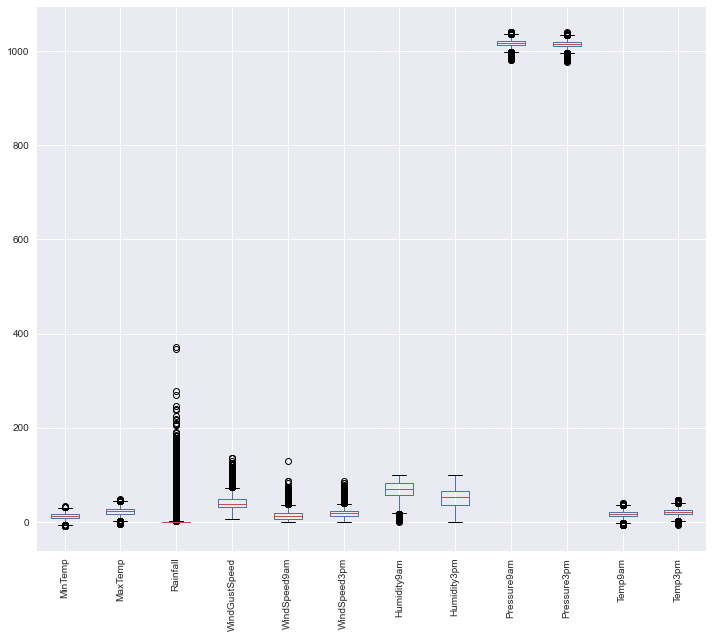

In [204]:
# Kita tidak bisa langsung mengganti missing value dengan mean karena ada kemungkinan outliers di data
# cek terlebih dahulu dengan box plot.
plt.figure(figsize=(12,10))
df.boxplot(num_col_with_null_values,rot = 90)

ada banyak outliers terutama di fitur Rainfall, dan fitur yang lainnya,  

#### Menangani Outliers untuk Numerical Atribut

In [205]:
# Menghapus outlier dengan membatasi menggunakan nilai (q1 dan q3).

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  df.loc[df[feature]<lower_limit, feature] = lower_limit
  df.loc[df[feature]>upper_limit, feature] = upper_limit

<AxesSubplot:>

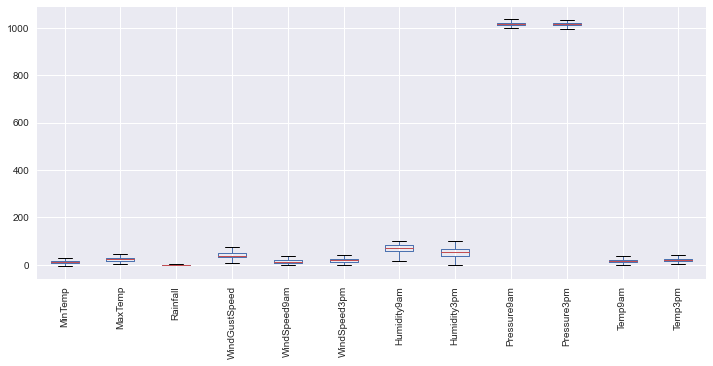

In [206]:
plt.figure(figsize=(12,5))
df.boxplot(num_col_with_null_values,rot = 90)    # kita bisa lihat tidak ada outlier lagi

In [207]:
# Setelah mengahapus outlier, ganti missing value dengan mean dari kolom tersebut
for features in num_col_with_null_values:
  df[features] = df[features].fillna(df[features].mean())   

In [208]:
# Tidak ada missing value/null value 
df[num_col_with_null_values].isnull().sum()  

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

### Explorasi Data

#### Summary Info and Stats

In [209]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Month
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194186,23.224781,0.487224,39.837792,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,16.991728,21.686191,6.399615
std,6.365000,7.069787,0.783872,12.515516,8.555341,8.442182,18.703607,20.471189,6.651697,6.606721,6.441838,6.822800,3.427262
min,-6.350000,2.450000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,-1.650000,1.900000,1.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,3.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.574162,69.000000,51.539116,1017.670297,1015.269781,16.800000,21.400000,6.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,9.000000
max,30.850000,43.650000,2.000000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,35.550000,41.100000,12.000000


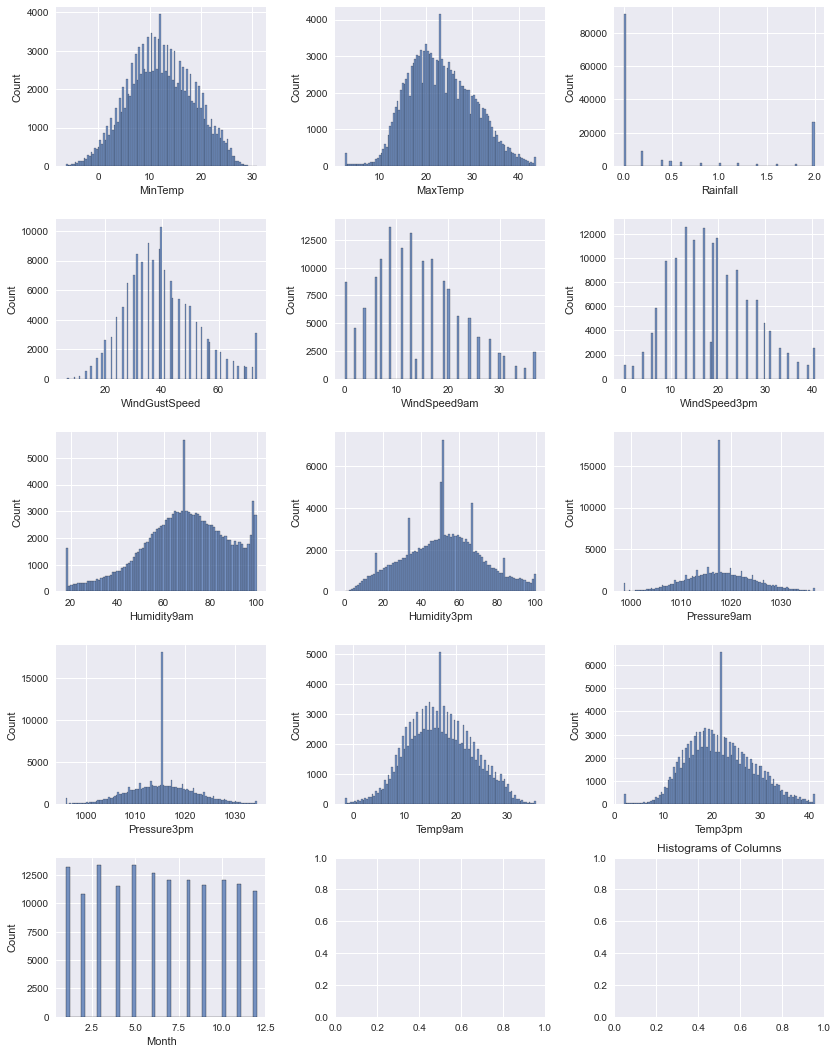

In [210]:
# Untuk melihat histogram dari kolom numerical. 
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 15))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object ]

for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])
    if (i == 20):
      break;

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns');


Analisis 
- Sebagian besar fitur terdistribusi secara normal seperti yang diharapkan.
- Distribusi `Sunshine` menarik tetapi sebagian besar dapat dijelaskan:
  - Frekuensi tinggi nilai 0 mewakili hari-hari di mana mendung sepanjang hari
  - Penurunan frekuensi yang tiba-tiba setelah sekitar 11 jam merupakan cerminan dari terbatasnya jumlah hari dalam setahun di mana cahaya padam selama berjam-jam atau lebih lama
- Distribusi `Humidity9am` sangat menarik karena lonjakan frekuensi yang besar
- Konsentrasi titik tertinggi untuk `MinTemp` adalah antara 10 hingga 12 derajat Celcius
- Konsentrasi titik tertinggi untuk `MaxTemp` adalah antara 18 hingga 22 derajat Celcius
- Kecepatan `WindGustSpeed` berkisar dari 0 hingga hampir 140 km/jam. Konsentrasi tertinggi adalah antara 38-40 km/jam
- Kecepatan angin maksimum pada pukul 09.00 (`WindSpeed9am`) berkisar antara 10 hingga 20 km/jam sedangkan pada pukul 15.00 berkisar antara 15 hingga 22 km/jam
- Konsentrasi titik tertinggi untuk kelembapan pada pukul 09.00 (`Humidity9am`) adalah antara 60-80% sedangkan pada pukul 15.00 adalah 40-70%
- Konsentrasi titik tertinggi untuk tekanan pada pukul 09:00 (`Pressure9am`) adalah antara 1015-1018 hpa dan pada pukul 15:00 antara 1015-1017 hpa
- Suhu maksimum pada jam 9 pagi (`Temp9am`) adalah antara 16-18 derajat Celcius dan pada jam 3 sore antara 21-23 derajat Celcius

#### Distribusi Lokasi

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'BadgerysCreek'),
  Text(2, 0, 'Cobar'),
  Text(3, 0, 'CoffsHarbour'),
  Text(4, 0, 'Moree'),
  Text(5, 0, 'Newcastle'),
  Text(6, 0, 'NorahHead'),
  Text(7, 0, 'NorfolkIsland'),
  Text(8, 0, 'Penrith'),
  Text(9, 0, 'Richmond'),
  Text(10, 0, 'Sydney'),
  Text(11, 0, 'SydneyAirport'),
  Text(12, 0, 'WaggaWagga'),
  Text(13, 0, 'Williamtown'),
  Text(14, 0, 'Wollongong'),
  Text(15, 0, 'Canberra'),
  Text(16, 0, 'Tuggeranong'),
  Text(17, 0, 'MountGinini'),
  Text(18, 0, 'Ballarat'),
  Text(19, 0, 'Bendigo'),
  Text(20, 0, 'Sale'),
  Text(21, 0, 'MelbourneAirport'),
  Text(22, 0, 'Melbourne'),
  Text(23, 0, 'Mildura'),
  Text(24, 0, 'Nhil'),
  Text(25, 0, 'Portland'),
  Text(26, 0, 'Watsonia'),
  Text(27, 0, 'Dartmoor'),
  Text(28,

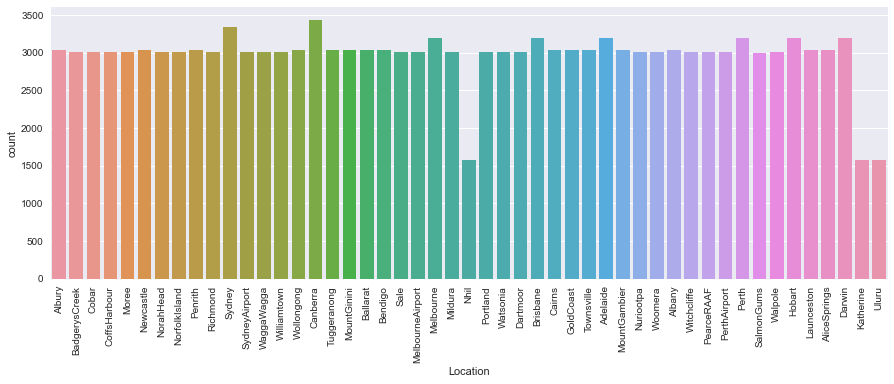

In [211]:
plt.figure(figsize=(15, 5))
sns.countplot(df['Location'])
plt.xticks(rotation=90)

Analisis

<ul>
     <li>Lokasi yang paling banyak datanya adalah Canberra diikuti oleh Sydney.</li>
     <li>Sebagian besar lokasi memiliki frekuensi mendekati 3000.</li>
     <li>Nhil, Katherine, dan Uluru jarang terjadi.</li>
</ul>

#### MinTemp dan MaxTemp setiap Lokasi

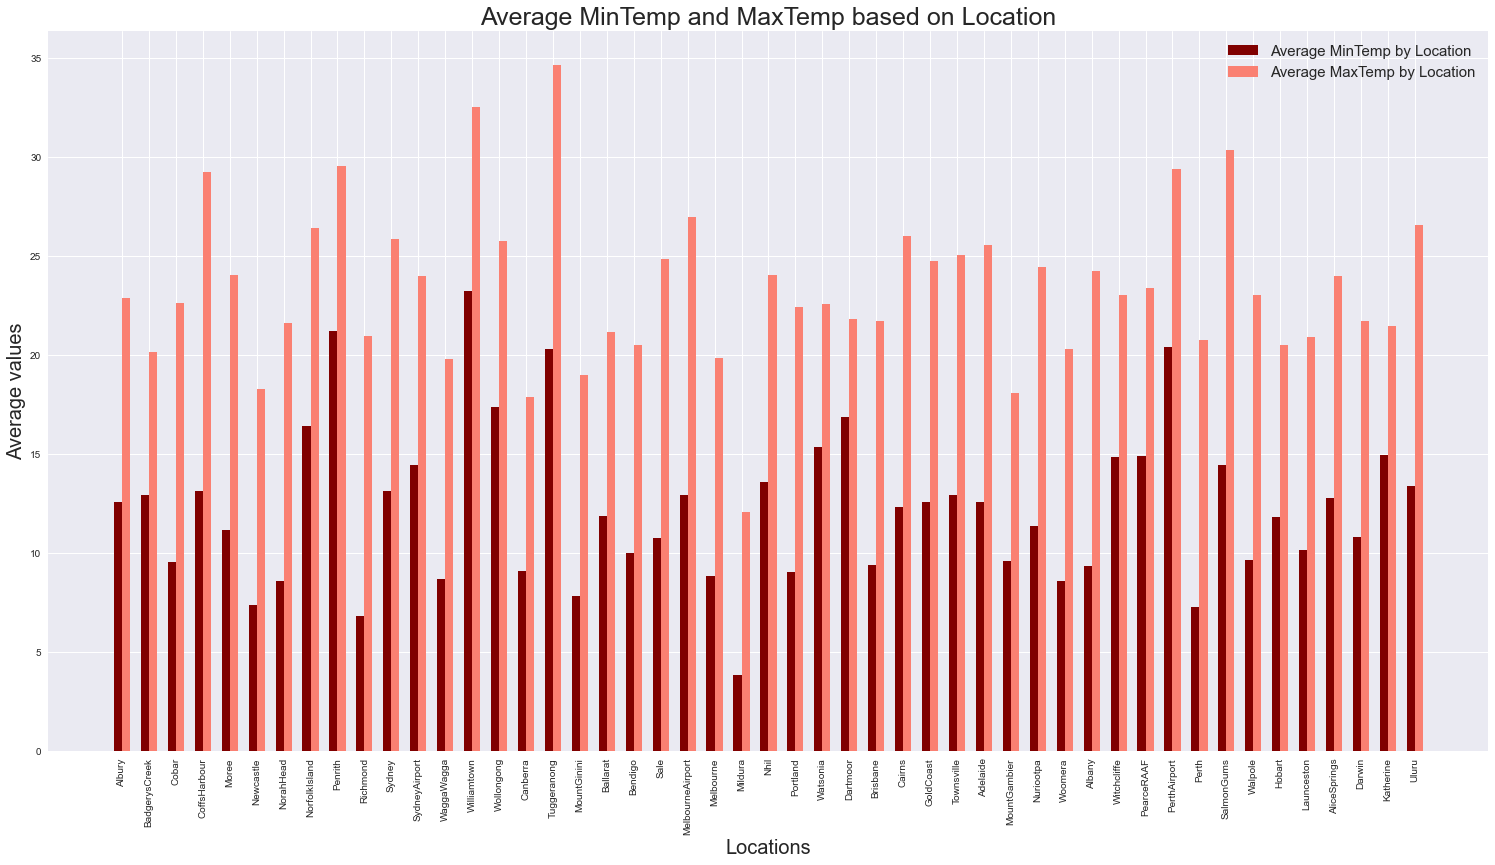

In [212]:
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (20,10)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

w = 0.3

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)

plt.xlabel('Locations', fontsize=20)
plt.ylabel('Average values', fontsize=20)
plt.title('Average MinTemp and MaxTemp based on Location', fontsize=25)
plt.legend(fontsize=15)

Analisis
<ul>
     <li>Suhu maksimum rata-rata di atas 20 derajat Celcius untuk sebagian besar lokasi.</li>
     <li>Suhu minimum rata-rata adalah antara 5 dan 15 derajat Celcius untuk sebagian besar lokasi.</li>
</ul>

#### Distribusi Rainfall Setiap Bulan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 576x288 with 0 Axes>

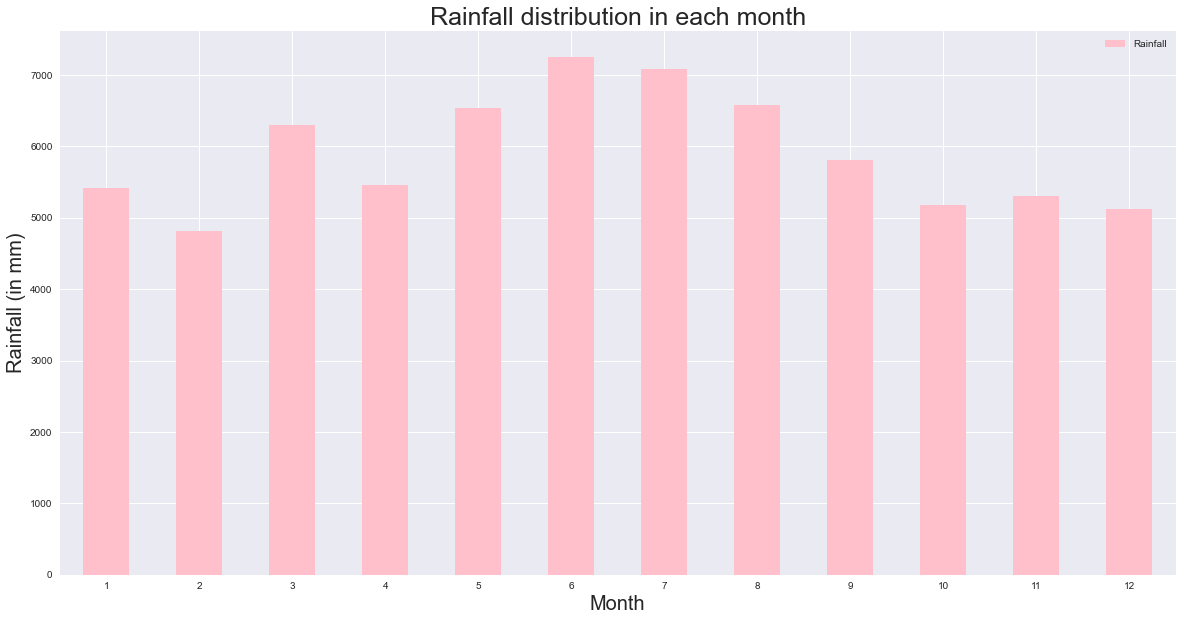

In [213]:

plt.figure(figsize=(8,4))
a = df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

Analisis
<ul>
     <li>Curah hujan maksimum (lebih dari 35.000 mm) terjadi pada bulan Maret.</li>
     <li>Januari dan Juni juga mengalami curah hujan yang tinggi (hampir 35.000 mm) diikuti oleh Februari.</li>
     <li>Curah hujan minimum terjadi pada bulan Oktober diikuti oleh September.</li>
</ul>

#### Central Tendency Pressure9am

---Menghitung Tendensi Sentral---
Mean:  1017.6702967904671
Mode:  1017.6702967905602
Median:  1017.6702967905602


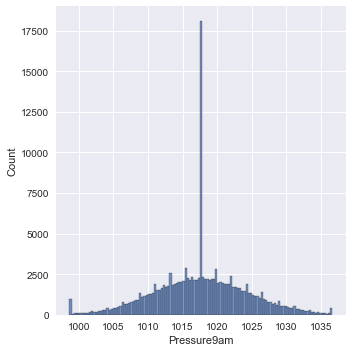

In [214]:
print("---Menghitung Tendensi Sentral---")
sns.displot(df.Pressure9am)
print("Mean: ", df['Pressure9am'].mean())
print("Mode: ", df['Pressure9am'].mode()[0])
print("Median: ", df['Pressure9am'].median())


Analisis
- Dari median, mean, dan mode yang sudah sama hasilnya, artinya ini terdistribusi secara sangat normal. Tidak ada condong ke kanan dan kiri.

### Korelasi RainToday dan RainTomorrow

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

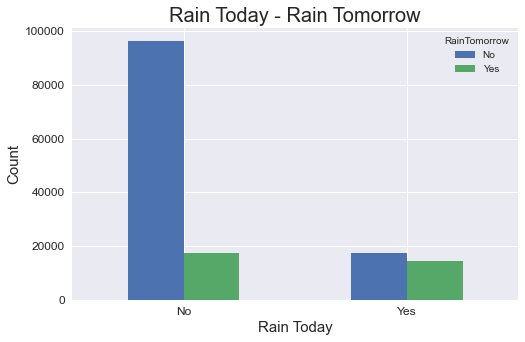

In [215]:
type_plt = pd.crosstab(df['RainToday'], df['RainTomorrow'])

plt.rcParams["figure.figsize"] = (8,5)

type_plt.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

Analisis
<ul>
     <li>Untuk catatan maksimum, tidak hujan selama dua hari.</li>
     <li>Selama hampir 20.000 rekaman, hari ini tidak hujan, tetapi hujan besok dan hujan untuk kedua hari tersebut.</li>
     <li>Untuk hampir 20.000 rekaman hari ini hujan, tapi besok tidak hujan.</li>
</ul>

#### Variability MaxTemp

In [216]:
# Variance
# kuadrat jarak rata-rata antara setiap kuantitas dan mean.
print('Variance dari Kolom MaxTemp = ', df['MaxTemp'].var(ddof=1))


Variance dari Kolom MaxTemp =  49.98188178413633


In [217]:
# Standard Deviation
#Standar deviasi yang rendah menunjukkan bahwa titik data cenderung mendekati rata-rata kumpulan data, sedangkan Standar deviasi yang tinggi menunjukkan bahwa titik data tersebar di nilai yang lebih luas.
print('Standard Deviation dari Kolom MaxTemp = ', df['MaxTemp'].var(ddof=1)**0.5)

Standard Deviation dari Kolom MaxTemp =  7.06978654445354


In [218]:
# Skewness


x = df['MaxTemp']

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

print("Nilai skew adalah ", skew_)


Nilai skew adalah  0.23695598479201244


In [219]:
# Percentiles
df['MaxTemp'].describe()

count    145460.000000
mean         23.224781
std           7.069787
min           2.450000
25%          18.000000
50%          22.700000
75%          28.200000
max          43.650000
Name: MaxTemp, dtype: float64

In [220]:
# Ranges
print('Range Kolom MaxTemp: ', df['MaxTemp'].max() - df['MaxTemp'].min())

Range Kolom MaxTemp:  41.2


Analisis
- Nilai standard deviation/variance menunjukkan seberapa tersebar data kita
- Nilai range nya 41,2 artinya jarak antara nilai terendah dan tertinggi. Jika digabung dengan standard deviation bisa menujukkan seberapa landai/curam kurva.  
- Nilai skewnessnya positif, artinya distribusinya positively skewed yaitu condong ke kiri
- Nilai percentiles menunjukkan pada rentang 75%, 50%, 25% berapa nilai data.

#### Mencari Rainy Days berdasarkan Location

In [221]:
# Buat salinan dataframe and ubah value RainToday and Tommorow menjadi 0 dan 1
df_ = df.copy()
df_.RainToday = [1 if each == 'Yes' else 0 for each in df_.RainToday]
df_.RainTomorrow = [1 if each == 'Yes' else 0 for each in df_.RainTomorrow]
df_['RainToday']


0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int64

In [222]:
df_rain_by_loc = df_.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,689
Albany,902
Albury,617
AliceSprings,244
BadgerysCreek,583


Bagan di atas berguna untuk memeriksa dengan cepat perbedaan antar lokasi sehubungan dengan jumlah hari hujan tetapi memiliki satu masalah utama: jumlah pengamatan dari setiap lokasi tidak persis sama. Memeriksa jumlah nilai untuk setiap lokasi (di bawah) mengungkapkan bahwa lokasi `Katherine`, `Nhil`, dan `Uluru` harus diabaikan saat menganalisis plot di atas. Lokasi yang tersisa memiliki jumlah nilai yang cukup dekat untuk dapat dibandingkan dengan benar.

### Data Preprocessing

#### Numerical Encoding

In [231]:
df_saved = df.copy() #untuk berjaga-jaga
df.isnull().sum() # mengecek apakah semua kolom sudah tidak ada null values
# Machine Learning hanya memahami data numerik sehingga perlu mengonversi
# fitur categorical ke dalam numerical sehingga perlu melakukan pengkodean

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

In [224]:
cat_fea = [i for i in df.columns if df[i].dtype == "O"]
cat_fea   # List dari kolom categorical yang perlu dikonversi

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [225]:
def encode_cat(feature):  
  mapping_dic = {}         #dictionary kosong 
  unique_val = list(df[feature].unique())    # ekstrak fitur tertentu dari data dan ubah menjadi list
  for idx in range(len(unique_val)):      # iterasi hingga jumlah value di list
    mapping_dic[unique_val[idx]] = idx    # assign index ke index dari list 
  return mapping_dic     


In [229]:
for i in cat_fea:   # iterasi dari list categorical features 
  df[i].replace(encode_cat(i), inplace = True)  

semua data telah terkonversi ke kategorikal menjadi nilai numerik

In [171]:
# PLot Correlation Matrix

corr = df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(5)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_5984/733907881.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='PuBu').set_precision(5)


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
MinTemp,1.00000,0.73339,0.05120,0.10136,0.18034,0.17753,-0.23072,0.00603,-0.42898,0.89776,0.69915,0.05457,0.08218,-0.20274
MaxTemp,0.73339,1.00000,-0.25598,0.11749,0.07323,0.01714,-0.49711,-0.49854,-0.31492,0.87937,0.96890,-0.22528,-0.15666,-0.16319
Rainfall,0.05120,-0.25598,1.00000,-0.04229,0.15129,0.10250,0.38745,0.40620,-0.17975,-0.11401,-0.26028,0.96354,0.32628,0.01196
WindGustDir,0.10136,0.11749,-0.04229,1.00000,-0.08494,0.04028,-0.05189,-0.04370,0.11838,0.10783,0.11870,-0.03491,-0.05686,-0.07399
WindGustSpeed,0.18034,0.07323,0.15129,-0.08494,1.00000,0.57856,-0.21435,-0.02887,-0.42419,0.15405,0.03942,0.14613,0.21852,0.05828
WindSpeed9am,0.17753,0.01714,0.10250,0.04028,0.57856,1.00000,-0.27340,-0.03304,-0.21443,0.13174,0.00720,0.09827,0.08487,0.05148
Humidity9am,-0.23072,-0.49711,0.38745,-0.05189,-0.21435,-0.27340,1.00000,0.65885,0.13318,-0.46854,-0.48963,0.34842,0.25224,-0.08907
Humidity3pm,0.00603,-0.49854,0.40620,-0.04370,-0.02887,-0.03304,0.65885,1.00000,-0.02434,-0.21658,-0.55521,0.36794,0.43318,-0.01857
Pressure9am,-0.42898,-0.31492,-0.17975,0.11838,-0.42419,-0.21443,0.13318,-0.02434,1.00000,-0.40342,-0.27212,-0.17602,-0.22957,0.03431
Temp9am,0.89776,0.87937,-0.11401,0.10783,0.15405,0.13174,-0.46854,-0.21658,-0.40342,1.00000,0.84621,-0.09571,-0.02546,-0.13529


In [145]:
df.drop(columns=['Location', 'WindSpeed3pm','WindDir3pm', 'WindDir9am', 'Pressure3pm', 'Month'],axis=1, inplace=True)

Analisis
- Drop kolom disini dilakukan karena ada beberapa fitur yang tidak berkorelasi
  - `WindSpeed3pm` memiliki nilai yang hampir mirip dengan `WindSpeed9am` sehingga bisa di drop 
  - `Pressure3pm` memiliki nilai yang hampir mirip dengan `Pressure9am` sehingga bisa di drop
  - `WindDir3pm`, `WindSpeed9am` dan `Location`  memiliki nilai yang mendekati nol dengan fitur lain sehingga bisa di drop 
  - `Month` memiliki korelasi yang kecil dengan `RainToday` sehingga bisa di drop 
  - Ke-6 fitur di atas juga memiliki korelasi kecil (mendekati nol) dengan `RainToday` dan `RainTomorow`, terutama `RainTomorrow` yang akan menjadi variabel dependent
- Fitur yang berkorelasi kuat dengan hampir semua fitur adalah Humidity. 
- Fitur yang berkorelasi kuat dengan `RainTomorrow` adalah `RainFall`, `Humidity`, dan `RainToday`

#### Splitting Data

In [146]:
y = df["RainTomorrow"]  # dependent variable
x = df.drop(["RainTomorrow"],axis = 1)  # indepedent variable  

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

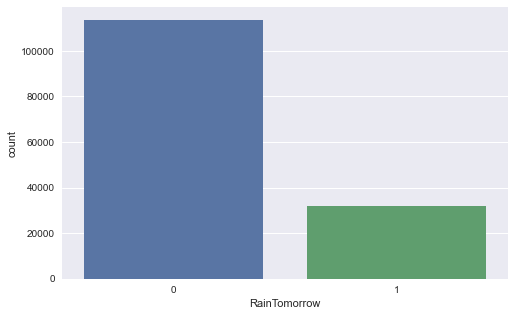

In [147]:
# Explore dependent variable

sns.countplot(df["RainTomorrow"])

### Pendefinisian Model

#### Splitting Data Into Training and Testing

In [148]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [149]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


#### Feature Scaling

Feature scaling adalah metode yang digunakan untuk menormalkan rentang variabel independen atau fitur data.

In [165]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


array([[-3.29602703e-01, -3.15385312e-01,  6.54114189e-01, ...,
        -1.59811929e-01, -5.29955069e-01, -1.17773698e-01],
       [ 8.97052102e-01,  5.76892174e-01,  1.92958246e+00, ...,
         7.64491483e-01,  1.88695242e+00, -9.92641116e-01],
       [ 5.98251573e-01,  1.03011248e+00, -6.21354083e-01, ...,
        -4.51583062e-04, -5.29955069e-01,  1.73848774e-01],
       ...,
       [-4.65285172e-02,  3.36118884e-01, -6.21354083e-01, ...,
         4.56390345e-01, -5.29955069e-01, -7.01018644e-01],
       [ 1.49465316e+00,  7.75176060e-01,  1.92958246e+00, ...,
         6.91134069e-01,  1.88695242e+00, -1.28426359e+00],
       [ 8.02694040e-01,  1.09508729e-01, -6.21354083e-01, ...,
         1.33617725e-01, -5.29955069e-01, -1.28426359e+00]])

In [166]:
x_test = scaler.transform(x_test)

array([[ 0.92850479, -0.01795948, -0.62135408, ...,  0.03091735,
        -0.52995507,  1.34033866],
       [ 0.58252523,  0.4635871 ,  1.92958246, ...,  0.51507628,
         1.88695242, -0.99264112],
       [ 0.67688329,  0.4635871 , -0.62135408, ...,  0.4123759 ,
        -0.52995507, -0.70101864],
       ...,
       [ 0.25227201,  1.44084339, -0.62135408, ...,  1.46872265,
        -0.52995507, -1.57588606],
       [-1.1945516 , -1.36345728, -0.62135408, ..., -1.39221648,
        -0.52995507,  0.75709372],
       [ 0.12646126, -0.1454277 , -0.62135408, ..., -0.14514045,
        -0.52995507,  1.34033866]])

#### Logistic Regression

In [152]:

classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#### SVM

In [153]:

classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(x_train,y_train)

SVC(kernel='linear')

### Evaluasi Model

#### Logistic Regression

In [154]:
# Model Testing
y_pred_logreg = classifier_logreg.predict(x_test)
y_pred_logreg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix
-----------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


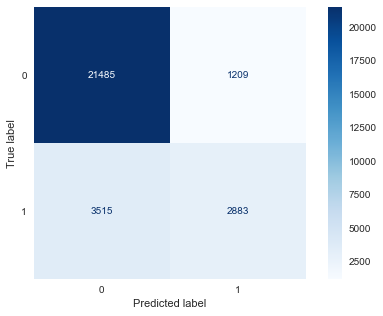



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22694
           1       0.70      0.45      0.55      6398

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.83      0.84      0.82     29092



ROC Curve
-----------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


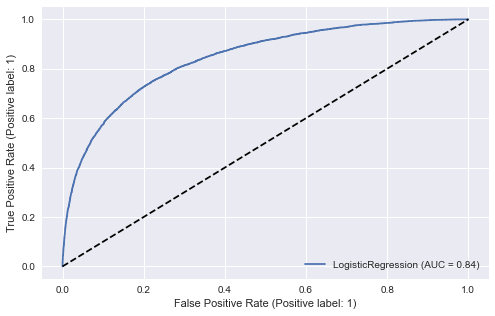



Checking model fitness
-----------------------------------------------------
Train score: 0.8383
Test score:  0.8376




In [155]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, y_pred=y_pred_logreg):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')
    
evaluate(classifier_logreg)

Analisis
- Performa yang layak untuk model dasar
- Recall adalah titik terlemah, terutama untuk hari-hari di mana besok hujan
- Modelnya pas, dengan skor train dan testing yang kurang lebih sama

#### Mencoba Correcting Class Imbalance
Ketidakseimbangan kelas saat ini ada untuk variabel target. Memperbaiki ini dapat membantu meningkatkan kinerja model. Gunakan sampel ulang data pelatihan menggunakan `SMOTE`.

In [156]:
x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train)

print('Original')
print('-'*20)
print(y_train.value_counts())
print('\n')
print('SMOTE')
print('-'*20)
print(pd.Series(y_train_resampled).value_counts())

Original
--------------------
0    90889
1    25479
Name: RainTomorrow, dtype: int64


SMOTE
--------------------
0    90889
1    90889
Name: RainTomorrow, dtype: int64


In [157]:
classifier_logreg_smote = LogisticRegression(solver='liblinear', random_state=42)
classifier_logreg_smote.fit(x_train_resampled, y_train_resampled)
y_pred_logreg_smote = classifier_logreg_smote.predict(x_test)
y_pred_logreg_smote

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Confusion Matrix
-----------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


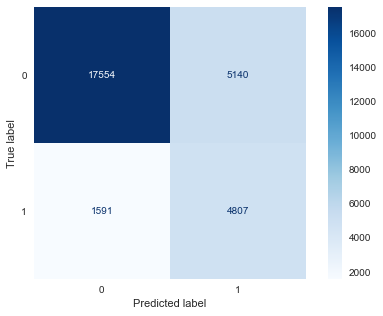



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     22694
           1       0.48      0.75      0.59      6398

    accuracy                           0.77     29092
   macro avg       0.70      0.76      0.71     29092
weighted avg       0.82      0.77      0.78     29092



ROC Curve
-----------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


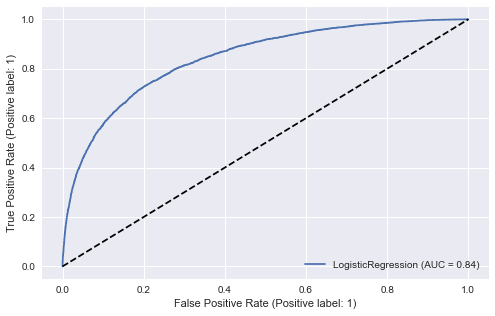



Checking model fitness
-----------------------------------------------------
Train score: 0.7629
Test score:  0.7686




In [158]:
evaluate(classifier_logreg_smote, X_train=x_train_resampled, y_train=y_train_resampled, y_pred=y_pred_logreg_smote)

Analisis
- Meskipun skor F1 positif sedikit meningkat, akurasi model ini menurun tajam
- Model ini tetap fit tetapi skor untuk set kereta dan tes menurun
- Ternyata menggunakan `SMOTE` memiliki kinerja yang lebih buruk dan tidak akan digunakan dalam iterasi berikutnya

#### SVM

In [159]:
# Model Testing
y_pred_svm = classifier_svm.predict(x_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix
-----------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


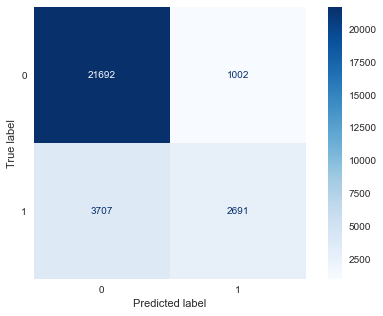



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22694
           1       0.70      0.45      0.55      6398

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.73     29092
weighted avg       0.83      0.84      0.82     29092



ROC Curve
-----------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


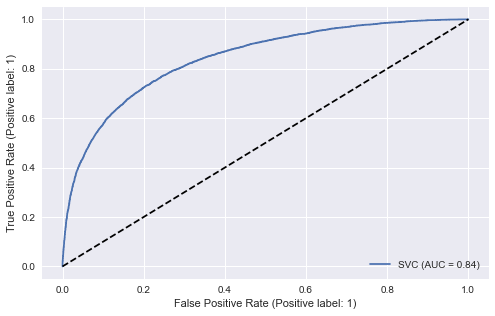



Checking model fitness
-----------------------------------------------------
Train score: 0.8386
Test score:  0.8381




In [160]:
evaluate(classifier_svm)

In [161]:
# Model Accuracy
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_svm)))

Accuracy Score: 0.8381341949676887


In [162]:
# Model Score
print("Train Data Score: {}".format(classifier_svm.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier_svm.score(x_test, y_test)))

Train Data Score: 0.8386240203492369
Test Data Score: 0.8381341949676887


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


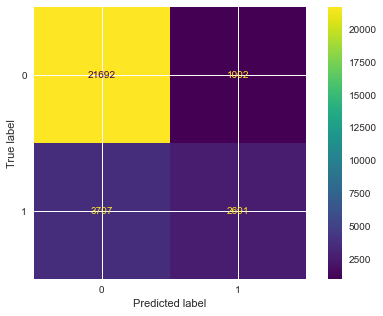

In [163]:
# Confussion Matrix

plot_confusion_matrix(classifier_svm, x_test,y_test)


### Model Inference

In [167]:
x

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Temp9am,Temp3pm,RainToday,Month
0,13.4,22.900000,0.6,0,44.000000,20.0,71.0,22.0,1007.7,16.9,21.8,0,12
1,7.4,25.100000,0.0,1,44.000000,4.0,44.0,25.0,1010.6,17.2,24.3,0,12
2,12.9,25.700000,0.0,2,46.000000,19.0,38.0,30.0,1007.6,21.0,23.2,0,12
3,9.2,28.000000,0.0,3,24.000000,11.0,45.0,16.0,1017.6,18.1,26.5,0,12
4,17.5,32.300000,1.0,0,41.000000,7.0,82.0,33.0,1010.8,17.8,29.7,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,14,31.000000,13.0,51.0,24.0,1024.6,10.1,22.4,0,6
145456,3.6,25.300000,0.0,4,22.000000,13.0,56.0,21.0,1023.5,10.9,24.5,0,6
145457,5.4,26.900000,0.0,5,37.000000,9.0,53.0,24.0,1021.0,12.5,26.1,0,6
145458,7.8,27.000000,0.0,12,28.000000,13.0,51.0,24.0,1019.4,15.1,26.0,0,6


In [176]:
# Buat variabel
min_temp = 13.4
max_temp = 22.900
rainfall = 0.6
wind_gust_dir = 0
wind_gust_speed = 44.0
wind_speed_9am = 20.0
humidity_9am = 71.0
humidity_3pm = 22.0
pressure_9am = 1007.7
temp_9am =16.9
temp_3pm = 21.8
rain_today = 0 #0(tidak hujan) atau 1(hujan)

# Fungsi
def predict_logreg(input):
  if (classifier_logreg.predict(input) == [0]):
    print('Tidak Hujan');
  else:
    print('Hujan');

def predict_svm(input):
  if (classifier_svm.predict(input) == [0]):
    print('Tidak Hujan');
  else:
    print('Hujan');


Tidak Hujan


In [ ]:
print('Hasil Prediksi Logreg')
predict_logreg([[min_temp, max_temp, rainfall, wind_gust_dir, wind_gust_speed, wind_speed_9am, humidity_9am, humidity_3pm, pressure_9am, temp_9am, temp_3pm, rain_today ]])

print('Hasil Prediksi SVM')
predict_svm([[min_temp, max_temp, rainfall, wind_gust_dir, wind_gust_speed, wind_speed_9am, humidity_9am, humidity_3pm, pressure_9am, temp_9am, temp_3pm, rain_today ]])

Export model dengan menggunakan library picke

In [168]:
pickle.dump(classifier_logreg, open('model/classifier_logreg','wb'))
pickle.dump(classifier_svm, open('model/classifier_svm','wb'))

### Pengambilan Kesimpulan

- Dataset ini terdapat banyak missing value. Missing value direplace dengan modus untuk categorical data, dengan mean untuk numerical data. Sebelum itu, juga dicek apakah ada outlier atau tidak karena mean sangat rentan dengan outlier. Didapatkan outlier tertinggi pada fitur Rainfall. Outlier dihilangkan dengan membatasi data menggunakan quantile Q3 dan Q1. Untuk invalid format, ada pada kolom Date sehingga diektraksi menjadi Day, Month, Year. Namun, Day dan Year tidak terlalu berpengaruh ke prediksi akhirnya dihilangkan. Setelah proses ini data dipastikan tidak ada missing value dan invalid format tabel.
- Pada bagian ekplorasi data, dilakukan eksplorasi dengan mengecek Grafik Distribusi Semua Kolom dan didapatkan kebanyakan distribusi normal. Setelah itu dicek juga distribusi MinTemp dan MaxTemp berdasarkan lokasi. Pada bagian ini juga ditemukan fitur yang memiliki fitur besar terhadap variabel dependent `RainTommorow` yaitu `RainFall`, `Humidity`, dan `RainToday`. Fitur yang di drop adalah `Location`, `Month`, `WindSpeed3pm`, `Pressure3pm`, `WindDir3pm`, `WindSpeed9am` karena memiliki korelasi yang sangat kecil dengan fitur lainnya dan terutama fitur `RainToday`. Sebelumnya, dilakukan pengetesan akurasi tanpa drop kolom, dan hasilnya akurasi hampir sama hanya ada perbedaan nilai 1%.
- Setelah dilakukan modeling menggunakan algoritma Logistic Linear didapatkan akurasi sebesar 83%. Pada tahap awal visualisasi data terlihat bahwa dataset mengalami ketidakseimbangan data pada variabel target, maka dari itu dilakukan percobaan menggunakan metode oversampling SMOTE untuk mendapatkan data yang seimbang. Setelah melakukan oversampling didapatkan akurasi sebesar 0.73 / 70%. Hal ini memperburuk hasila akurasi dan tidak akan digunakan model ini. Untuk perbandingan Precision, Recall, Fscore rata-rata nilai lebih seimbang pada oversampling SMOTE tapi lebih kecil dibanding tanpa menggunakan oversampling.
- Untuk algoritma SVM mendapatkan akurasi yang sama dengan Logistic Linear yaitu 83%. Pembuatan model dengan SVM lebih lama dilakukan karena kompleksitas algortima ini kira-kira O(n_samples^2 * n_features). Untuk perbandingan Precision, Recall, Fscore rata-rata nilai kurang lebih sama dengan Logistic Linear.